<a href="https://colab.research.google.com/github/wgy230041/Flight-Price/blob/master/flight_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q -U tensor2tensor
!pip install -q tensorflow matplotlib

# Imports we need.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import collections

from tensor2tensor import models
from tensor2tensor import problems
from tensor2tensor.layers import common_layers
from tensor2tensor.utils import trainer_lib
from tensor2tensor.utils import t2t_model
from tensor2tensor.utils import registry
from tensor2tensor.utils import metrics

# Enable TF Eager execution
tfe = tf.contrib.eager
tfe.enable_eager_execution()

# Other setup
Modes = tf.estimator.ModeKeys

# Setup some directories
data_dir = os.path.expanduser("~/t2t/data")
tmp_dir = os.path.expanduser("~/t2t/tmp")
train_dir = os.path.expanduser("~/t2t/train")
checkpoint_dir = os.path.expanduser("~/t2t/checkpoints")
tf.gfile.MakeDirs(data_dir)
tf.gfile.MakeDirs(tmp_dir)
tf.gfile.MakeDirs(train_dir)
tf.gfile.MakeDirs(checkpoint_dir)
gs_data_dir = "gs://tensor2tensor-data"
gs_ckpt_dir = "gs://tensor2tensor-checkpoints/"


In [0]:
problems.available()


In [0]:
# Fetch the MNIST problem
mnist_problem = problems.problem("image_mnist")
# The generate_data method of a problem will download data and process it into
# a standard format ready for training and evaluation.
mnist_problem.generate_data(data_dir, tmp_dir)


INFO:tensorflow:Reading data files from /root/t2t/data/image_mnist-train*
INFO:tensorflow:partition: 0 num_data_files: 10
:::MLPv0.5.0 transformer 1541391712.974395990 (<ipython-input-7-86d8bf270b0e>:1) input_order
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.
Label: 3


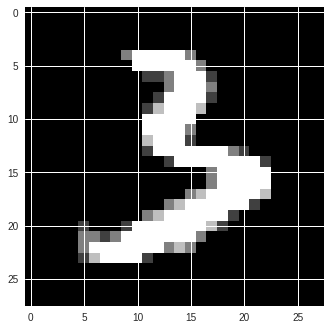

In [0]:
mnist_example = tfe.Iterator(mnist_problem.dataset(Modes.TRAIN, data_dir)).next()
image = mnist_example["inputs"]
label = mnist_example["targets"]

plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap('gray'))
print("Label: %d" % label.numpy())

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, svm, naive_bayes, neighbors, ensemble
from sklearn.metrics import mean_squared_error, accuracy_score

name = 'flightdata'

def one_hot_labels(labels):
    one_hot_labels = np.zeros((labels.size, 10))
    one_hot_labels[np.arange(labels.size),labels.astype(int)] = 1
    return one_hot_labels

def random_forest_train(X,y,X_test,y_test,test=False):
	n_estimators=18
	clf = ensemble.RandomForestClassifier(n_estimators=n_estimators)
	clf.fit(X,y)
	pred = clf.predict(X)
	print("Training Accuracy: {}".format(accuracy_score(y, pred)))
	if test:
		test_pred = clf.predict(X_test)
		print("Test Accuracy for n={}: {}".format(n_estimators,accuracy_score(y_test, test_pred)))
		test_pred_ones = test_pred[y_test==1]
		test_pred_zeros = test_pred[y_test==0]
		print("Test Accuracy for Positives: {}".format(accuracy_score(test_pred_ones,np.ones(test_pred_ones.shape))))
		print("Test Accuracy for Negatives: {}".format(accuracy_score(test_pred_zeros,np.zeros(test_pred_zeros.shape))))

def knn_train(X,y,X_test,y_test,test=False):
	n_neighbors = 3
	clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
	clf.fit(X,y)
	pred = clf.predict(X)
	print("Training Accuracy: {}".format(accuracy_score(y, pred)))
	if test:
		test_pred = clf.predict(X_test)
		print("Test Accuracy for k={}: {}".format(n_neighbors,accuracy_score(y_test, test_pred)))
		test_pred_ones = test_pred[y_test==1]
		test_pred_zeros = test_pred[y_test==0]
		print("Test Accuracy for Positives: {}".format(accuracy_score(test_pred_ones,np.ones(test_pred_ones.shape))))
		print("Test Accuracy for Negatives: {}".format(accuracy_score(test_pred_zeros,np.zeros(test_pred_zeros.shape))))

def nb_train(X,y,X_test,y_test,test=False):
	clf = naive_bayes.GaussianNB()
	clf.fit(X,y)
	pred = clf.predict(X)
	print("Training Accuracy: {}".format(accuracy_score(y, pred)))
	if test:
		test_pred = clf.predict(X_test)
		print("Test Accuracy: {}".format(accuracy_score(y_test, test_pred)))

def svm_train(X,y,X_test,y_test,test=False):
	clf = svm.SVC()
	clf.fit(X,y)
	pred = clf.predict(X)
	print("Training Accuracy: {}".format(accuracy_score(y, pred)))
	if test:
		test_pred = clf.predict(X_test)
		print("Test Accuracy: {}".format(accuracy_score(y_test, test_pred)))
		test_pred_ones = test_pred[y_test==1]
		test_pred_zeros = test_pred[y_test==0]
		print("Test Accuracy for Positives: {}".format(accuracy_score(test_pred_ones,np.ones(test_pred_ones.shape))))
		print("Test Accuracy for Negatives: {}".format(accuracy_score(test_pred_zeros,np.zeros(test_pred_zeros.shape))))

def logistic_regression_train(X,y,X_test,y_test,test=False):
	reg = linear_model.LogisticRegression()
	reg.fit(X, y)
	pred = reg.predict(X)
	print("Training Accuracy: {}".format(accuracy_score(y, pred)))
	if test:
		test_pred = reg.predict(X_test)
		print("Test Accuracy: {}".format(accuracy_score(y_test, test_pred)))
		test_pred_ones = test_pred[y_test==1]
		test_pred_zeros = test_pred[y_test==0]
		print("Test Accuracy for Positives: {}".format(accuracy_score(test_pred_ones,np.ones(test_pred_ones.shape))))
		print("Test Accuracy for Negatives: {}".format(accuracy_score(test_pred_zeros,np.zeros(test_pred_zeros.shape))))

def make_graphs(X_,y):
	"""
	plt.plot(X_[y==1][:,6],X_[y==1][:,-2],'r.')
	plt.figure()
	plt.plot(X_[y==0][:,6],X_[y==0][:,-2],'b.')
	"""
	fig3 = plt.figure()
	ax = fig3.add_subplot(111)
	ax.spines['top'].set_color('none')
	ax.spines['bottom'].set_color('none')
	ax.spines['left'].set_color('none')
	ax.spines['right'].set_color('none')
	ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
	ax.set_ylabel('Average Minimum Price')
	ax.set_xlabel('Days Before Flight')
	ax1 = fig3.add_subplot(911)
  
	ax1.set_title("New York (JFK)")
	lga_buckets =np.zeros(21)
	lga_flights = X_[X_[:,-1] == 4]
	for i in range(21):
		lga_buckets[i] = np.mean(lga_flights[lga_flights[:,6]//24 == i][:,-2], axis=0)
	plt.plot(range(0,-21,-1),lga_buckets)

  plt.figure()
	plt.title("Aggregated")
	plt.xlabel("Days Before Flight")
	plt.ylabel("Average Minimum Price")
	buckets = np.zeros(21)
	for i in range(21):
		buckets[i] = np.mean(X_[X_[:,6]//24 == i][:,-2], axis=0)
	plt.plot(range(0,-21,-1),buckets)

	plt.figure()
	plt.title("Day of Week (of Purchase)")
	buckets_day = np.zeros(7)
	plt.xticks(range(7),('Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'))
	plt.ylabel("Average Minimum Price")
	for i in range(7):
		buckets_day[i] = np.mean(X_[X_[:,2] == i][:,-2], axis=0)
	plt.plot(range(7),buckets_day)

	plt.figure()
	plt.title("Time of Day (of Purchase)")
	buckets_tod = np.zeros(4)
	plt.xticks(range(4),('12am-6am','6am-12pm','12pm-6pm','6pm-12am'))
	plt.ylabel("Average Minimum Price")
	for i in range(4):
		buckets_tod[i] = np.mean(X_[X_[:,4] == i][:,-2], axis=0)
	plt.plot(range(4),buckets_tod)

	plt.show()

def look_at_features(X,y):
	X_ones = X[y==1]
	total_ones = y[y==1].shape[0]
	print(total_ones)
	print("Weekdays?")
	for i in range(7):
		day_ = X[X[:,0] == i]
		ones_day_ = X_ones[X_ones[:,0] == i]
		print("Percentage of {} that are positives: {}".format(i, ones_day_.shape[0]/day_.shape[0]))
		#print("Percentage of positives that are {}: {}".format(i,ones_day_.shape[0]/total_ones))


	print("Weekday of Flight?")
	for i in range(7):
		day_ = X[X[:,1] == i]
		ones_day_ = X_ones[X_ones[:,1] == i]
		print("Percentage of {} that are positives: {}".format(i, ones_day_.shape[0]/day_.shape[0]))
		#print("Percentage of positives that are {}: {}".format(i,ones_day_.shape[0]/total_ones))

	print("Time of Day?")
	for i in range(4):
		tod = X[X[:,2] == i]
		ones_tod = X_ones[X_ones[:,2] == i]
		print("Percentage of {} that are positives: {}".format(i, ones_tod.shape[0]/tod.shape[0]))
		#print("Percentage of positives that are {}: {}".format(i,ones_tod.shape[0]/total_ones))

	print("Time of Day of Flight?")
	for i in range(4):
		tod = X[X[:,3] == i]
		ones_tod = X_ones[X_ones[:,3] == i]
		print("Percentage of {} that are positives: {}".format(i, ones_tod.shape[0]/tod.shape[0]))
		#print("Percentage of positives that are {}: {}".format(i, ones_tod.shape[0]/total_ones))

if __name__ == '__main__':  
	data = np.loadtxt('{}_training.txt'.format(name), dtype=int) 
	X = data[:, 2:-2]
	y = data[:, -1] 
	ones = y[y==1]
	print("Percentage of positives (training set): {}".format(ones.shape[0]/y.shape[0]))
	data_test = np.loadtxt('{}_testing.txt'.format(name), dtype=int)
	X_test = data_test[:, 2:-2]
	y_test = data_test[:, -1]
	ones_test = y_test[y_test==1]
	print("Percentage of positives (test set): {}".format(ones_test.shape[0]/y_test.shape[0]))

	make_graphs(data[:,:-1],y)
	#look_at_features(X,y)
	"""
	# One hot labels for weekday and time of day features
	one_hot_request_weekday = one_hot_labels(data[:,2])
	one_hot_flight_weekday = one_hot_labels(data[:,3])
	one_hot_request_tod = one_hot_labels(data[:,4])
	one_hot_flight_tod = one_hot_labels(data[:,5])
	one_hot_request_weekday_test = one_hot_labels(data_test[:,2])
	one_hot_flight_weekday_test = one_hot_labels(data_test[:,3])
	one_hot_request_tod_test = one_hot_labels(data_test[:,4])
	one_hot_flight_tod_test = one_hot_labels(data_test[:,5])
	non_one_hot = data[:, 6:-2]
	non_one_hot_test = data_test[:, 6:-2]
	X_one_hot = np.concatenate([one_hot_request_weekday, one_hot_flight_weekday, one_hot_request_tod, one_hot_flight_tod, non_one_hot],axis=1)
	X_one_hot_test = np.concatenate([one_hot_request_weekday_test, one_hot_flight_weekday_test, one_hot_request_tod_test, one_hot_flight_tod_test, non_one_hot_test],axis=1)
	
	print("Logistic Regression:")
	logistic_regression_train(X, y, X_test, y_test,test=True)
	print("Logistic Regression (one hot labels):")
	logistic_regression_train(X_one_hot, y, X_one_hot_test, y_test,test=True)
	
	print("SVM:")
	svm_train(X,y,X_test,y_test,test=True)
	print("SVM (with one hot labels):")
	svm_train(X_one_hot,y,X_one_hot_test,y_test,test=True)
	
	print("K Nearest Neighbors:")
	knn_train(X,y,X_test,y_test,test=True)
	print("Random Forest:")
	random_forest_train(X,y,X_test,y_test,test=True)
	"""

OSError: ignored